# Importing the global height data
### Importing modules

In [1]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint

### Importing raw file

In [2]:

# athlete events df from csv
global_file = os.path.join("..","data", "rawData","NCD_RisC_eLife_2016_height_age18_countries.txt")
global_df = pd.read_csv(global_file, encoding="ISO-8859-1")

# To get the raw data count, commented out to keep the original df .head() results prominent
raw_count = len(global_df)

# preview the raw data
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm)
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077


### Check for nulls...

In [3]:
# checking for any null values
pd.isna(global_df).any()

# looks good!


Country                                            False
ISO                                                False
Sex                                                False
Year of birth                                      False
Mean height (cm)                                   False
Mean height lower 95% uncertainty interval (cm)    False
Mean height upper 95% uncertainty interval (cm)    False
dtype: bool

### Correcting the measures!  Also adding "Olympic Year", an offset of 19

In [4]:
# conver the height stuff
global_df['Mean height (inches)'] = global_df['Mean height (cm)'].apply(lambda x: x / 2.54)
global_df['Mean height lower 95% uncertainty interval (inches)'] = global_df['Mean height lower 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)
global_df['Mean height upper 95% uncertainty interval (inches)'] = global_df['Mean height upper 95% uncertainty interval (cm)'].apply(lambda x: x / 2.54)

# setting offset to 19 for now
offset = 19

global_df['Olympic Year'] = global_df['Year of birth'] + offset

# looking at new columns
global_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033,63.450431,60.820585,66.044895,1915
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618,63.463105,60.854962,66.007724,1916
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576,63.475707,60.908402,65.985266,1917
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113,63.488475,60.958915,65.955950,1918
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077,63.501208,61.007693,65.948062,1919


### chart the data over time (men/women 1896-2016)

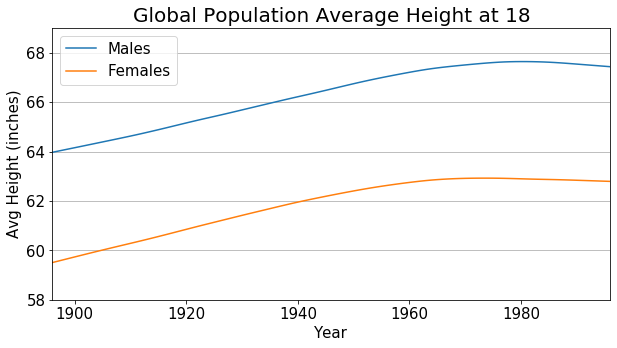

In [5]:
# group by to get the average
global_avg = pd.DataFrame(global_df.groupby(['Year of birth','Sex'])['Mean height (inches)'].mean().reset_index())

# pivot to get 1 column per gender
global_pivot = global_avg.pivot(index='Year of birth', columns='Sex', values = 'Mean height (inches)').reset_index()

# rename columns
global_pivot = global_pivot.rename(columns={'Men':'Males', 'Women': 'Females'})
global_pivot.head()


global_chart = global_pivot.plot(
    x = 'Year of birth',
    y = ['Males', 'Females'],
    figsize=(10,5),
    ylim = (58,69),
    fontsize = 15
)

# add axis labels
global_chart.set_xlabel("Year", fontsize=15)
global_chart.set_ylabel('Avg Height (inches)', fontsize=15)
global_chart.yaxis.grid(True)
global_chart.legend(loc='best',fontsize=15)
global_chart.set_title('Global Population Average Height at 18', fontdict={'fontsize': 20, 'fontweight': 'medium'})

global_chart.get_figure().savefig('..\images\global_height_1896_2016.png')

### Just the men to match the Olympic data...

In [6]:
men_df = global_df.loc[global_df['Sex']=='Men']

men_df.head()

,Country,ISO,Sex,Year of birth,Mean height (cm),Mean height lower 95% uncertainty interval (cm),Mean height upper 95% uncertainty interval (cm),Mean height (inches),Mean height lower 95% uncertainty interval (inches),Mean height upper 95% uncertainty interval (inches),Olympic Year
0,Afghanistan,AFG,Men,1896,161.164095,154.484285,167.754033,63.450431,60.820585,66.044895,1915
1,Afghanistan,AFG,Men,1897,161.196286,154.571603,167.659618,63.463105,60.854962,66.007724,1916
2,Afghanistan,AFG,Men,1898,161.228297,154.707340,167.602576,63.475707,60.908402,65.985266,1917
3,Afghanistan,AFG,Men,1899,161.260727,154.835644,167.528113,63.488475,60.958915,65.955950,1918
4,Afghanistan,AFG,Men,1900,161.293068,154.959540,167.508077,63.501208,61.007693,65.948062,1919


### Save a copy of this file, we want to compare it to the olympian data in that cleaning process...

In [7]:
full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_AllYears.csv")
men_df.to_csv(full_file, index=False, header=True)

### Grab only 1960-2016, but at estimated Olympic age (since we have DOB)
We may need to add something to year of birth to align the data better.  Someone competing in the 2000 Olympics would have been born sometime in the 1980's.\n 
Maybe we need to grab the median age from olympic data?
For now, setting offset to 19 years...

In [8]:
# variable to store generation offset
age_offset = 19

# new column to show "estimated" year of olympic competition
men_df['Olympic Year'] = men_df['Year of birth'] + age_offset

# verify
# men_df.head()

# now just grab the years we are interested in "Olympic Year" >= 1960 and <= 2016
men_modern_df = men_df.loc[globalMen['Olympic Year']>=1960]

men_modern_df.head()

C:\Users\18324\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


NameError: name 'globalMen' is not defined

### Now only go every 4 years...

In [ ]:
# series of the Olympic years (every 4)
olympic_yrs = np.arange(1960,2020,4)

# # make it a dataframe
olympicYr_df = pd.DataFrame({
    'Olympic Year': olympic_yrs
})

# now merge with global height data
globalOlympic = pd.merge(men_modern_df,olympicYr_df, on='Olympic Year', how='inner')

# # # looking at it
globalOlympic.head()


### avg the averages
#### Looking at the global average by Olympic year

In [ ]:
# group by object to average height for males, across Olympic years (Year of Birth + Offset)
avg_df = pd.DataFrame(globalOlympic.groupby('Olympic Year')['Mean height (inches)'].mean().reset_index())

# avg_df.head(20)

# plot for fun
male_avg = avg_df.plot(
    x = 'Olympic Year',
    y = 'Mean height (inches)',
    figsize=(10,5),
    ylim = (66,68),
    fontsize = 15
)

# add axis labels
male_avg.set_xlabel("Olympic Year", fontsize=15)
male_avg.set_ylabel('Avg Height (inches)', fontsize=15)
male_avg.yaxis.grid(True)
male_avg.legend(loc='best',fontsize=15)
male_avg.set_title('Global Avg Male Height at Olympic Age', fontdict={'fontsize': 20, 'fontweight': 'medium'})

male_avg.get_figure().savefig('..\images\global_male_avg.png')    


### save clean data to csv, to be used when datasets are combined

In [ ]:
full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_1960_2016.csv")
globalOlympic.to_csv(full_file, index=False, header=True)

full_file = os.path.join("..", "data", "cleanData", "Mens_WorldHeight_Avg.csv")
avg_df.to_csv(full_file, index=False, header=True)
